# Project Title: Weather Time Series Analysis and Temperature Prediction

## Meera S

## Organization: Entri Elevate

## Date:28/05/2000

### Problem Statement

The goal of this project is to develop a predictive model that accurately forecasts temperature based on weather data from the dataset. By analyzing various weather features, the model aims to predict temperature with high accuracy.

### Expected Outcome

Develop a model that accurately predicts temperature with low error rates. The expected outcome includes detailed exploratory data analysis, preprocessing steps, model training, and evaluation metrics.

Target variable: T (degC) Features:T (degC), rh (%), p (mbar), VPmax (mbar), Tpot (K), Tdew (degC), VPact (mbar), VPdef (mbar), sh (g/kg), H2OC (mmol/mol), rho (g/m**3), wv (m/s), max. wv (m/s), wd (deg).

### 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 3. Loading the Dataset

In [2]:
data = pd.read_csv('max_planck_weather_ts.csv')

### 4. Data Exploration

In [5]:
# Display the first 5 rows of the dataset
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [6]:
# Display the data types, non-null counts, and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [7]:
#Statistical summary
data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [8]:
data.shape

(420551, 15)

In [9]:
# Checking the null values
data.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [10]:
duplicate_rows = data[data.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
                  Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
78766   01.07.2010 00:10:00    992.06     17.87    291.69        14.06   
78767   01.07.2010 00:20:00    992.02     17.82    291.65        14.03   
78768   01.07.2010 00:30:00    992.04     17.92    291.75        14.09   
78769   01.07.2010 00:40:00    991.96     17.82    291.65        14.02   
78770   01.07.2010 00:50:00    991.90     17.54    291.38        13.96   
...                     ...       ...       ...       ...          ...   
274743  21.03.2014 16:40:00    980.50     18.62    293.43         4.58   
274744  21.03.2014 16:50:00    980.52     18.30    293.10         4.67   
274745  21.03.2014 17:00:00    980.74     18.15    292.93         4.79   
274746  21.03.2014 17:10:00    980.97     18.01    292.77         4.88   
274747  21.03.2014 17:20:00    981.17     17.82    292.57         4.88   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
78766    78.40         2

Upon analyzing the dataset, we identified a total of 327 duplicate rows.
By eliminating these duplicates, we aim to maintain a clean dataset, thus ensuring the reliability and validity of our results.

In [3]:
# Remove duplicate rows
data_no_duplicates = data.drop_duplicates()

# Verify that duplicates are removed
print("Number of rows after removing duplicates:", data_no_duplicates.shape[0])


Number of rows after removing duplicates: 420224


In [4]:
# Convert 'Date Time' to datetime object
import pandas as pd
# Convert 'Date Time' to datetime object
data['Date Time'] = pd.to_datetime(data['Date Time'], format='%d.%m.%Y %H:%M:%S')

### Outlier Detection and Treatment

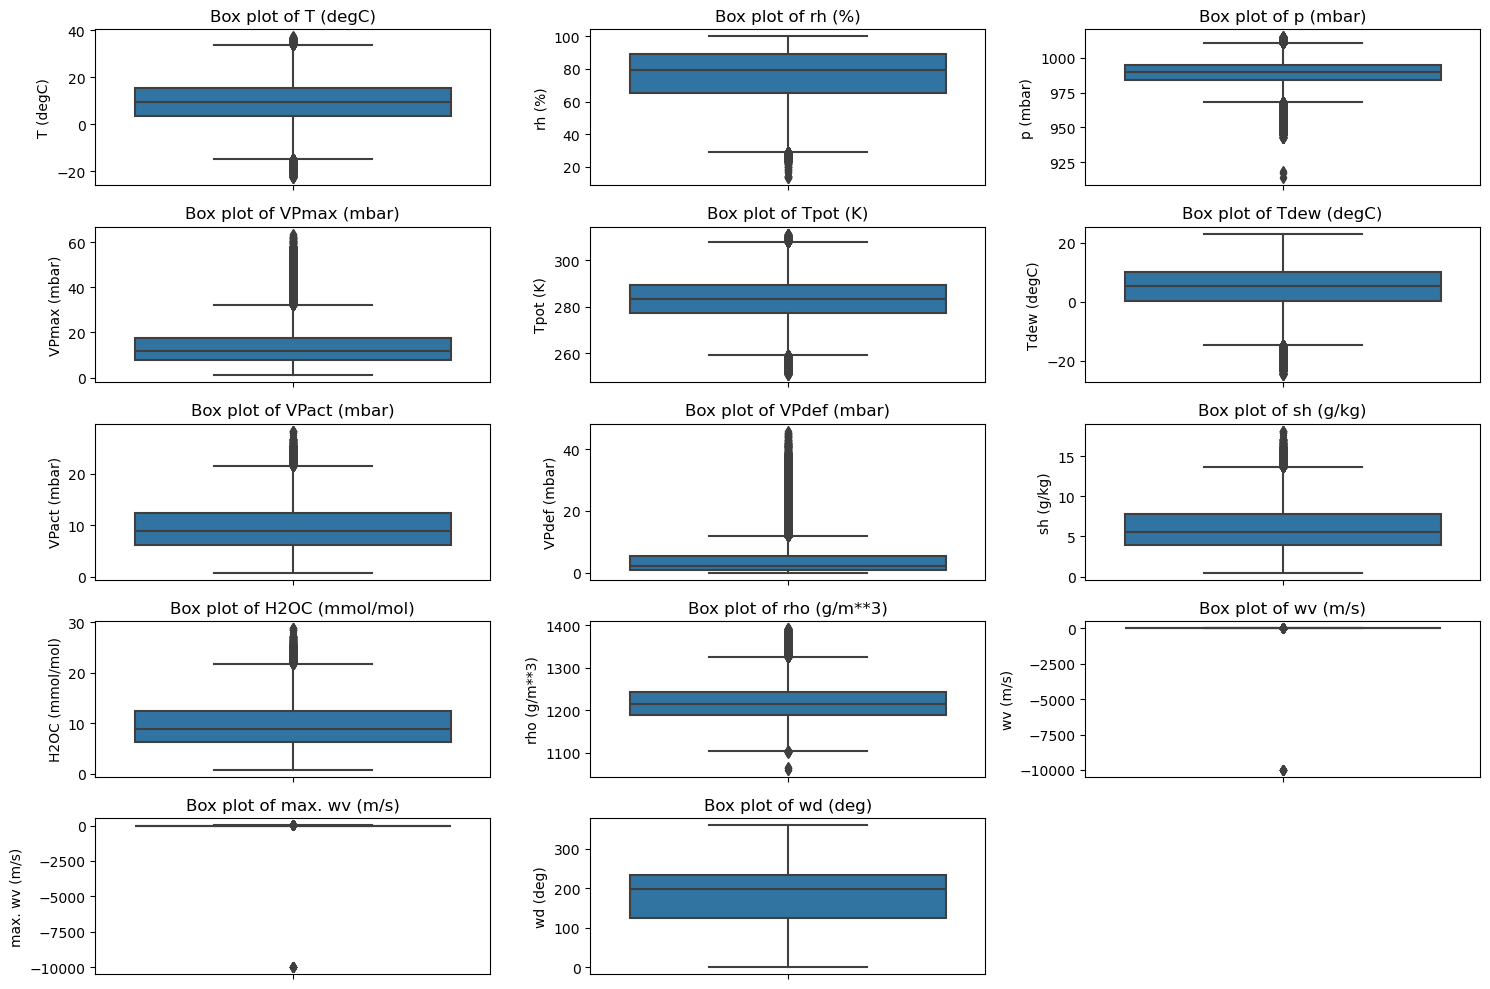

In [5]:
features = ['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 
            'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 
            'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

# Create box plots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)  # Adjust the layout based on the number of features
    sns.boxplot(y=data_no_duplicates[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

From the box plots, it is evident that the majority of the features exhibit outliers.
These outliers can significantly skew our analysis, leading to inaccurate results.
Therefore, to ensure the robustness and reliability of our findings, we will proceed with removing these outliers from the dataset.

To ensure the integrity and reliability of our data analysis, we have decided to remove outliers from our dataset using the Interquartile Range (IQR) method. This method helps in identifying and eliminating extreme values that can skew the results.

In [6]:

# Calculate Q1, Q3, and IQR for each feature
Q1 = data_no_duplicates[features].quantile(0.25)
Q3 = data_no_duplicates[features].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds for each feature
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a filter for each feature to exclude outliers
filter_conditions = pd.DataFrame(True, index=data_no_duplicates.index, columns=features)
for feature in features:
    filter_conditions[feature] = (data_no_duplicates[feature] >= lower_bound[feature]) & (data_no_duplicates[feature] <= upper_bound[feature])

# Apply the filter across all features
data_filtered = data_no_duplicates[filter_conditions.all(axis=1)]

# Print the shape of the original and filtered DataFrames to see the effect of the filtering
print(f'Original data shape: {data_no_duplicates.shape}')
print(f'Filtered data shape: {data_filtered.shape}')


Original data shape: (420224, 15)
Filtered data shape: (362898, 15)


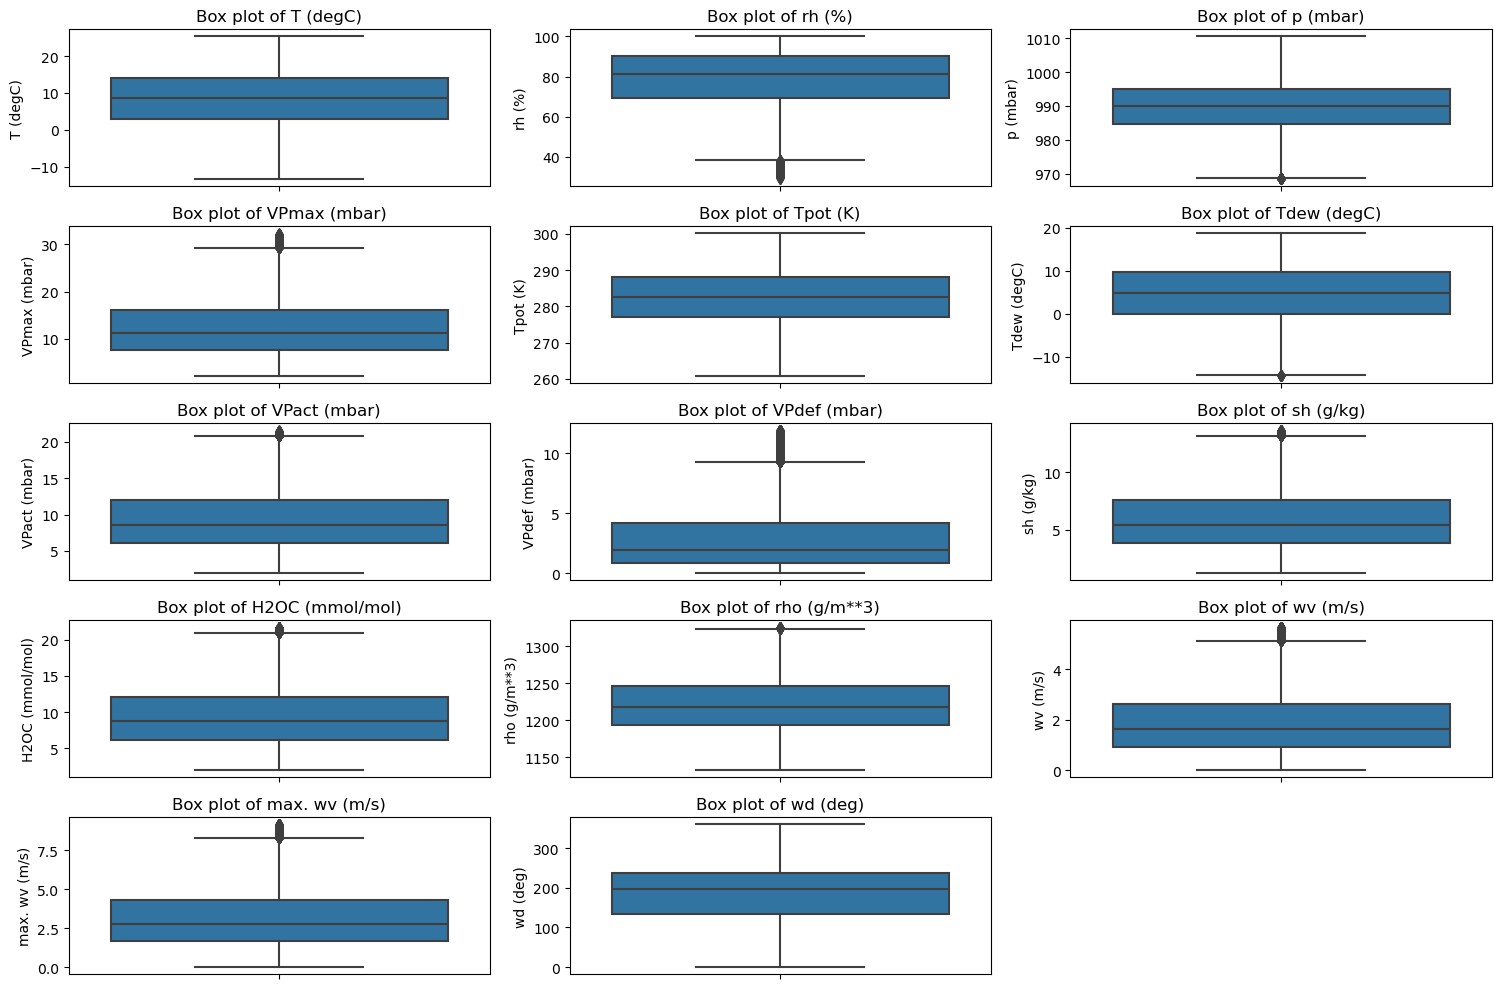

In [7]:
features = ['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 
            'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 
            'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

# Create box plots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)  # Adjust the layout based on the number of features
    sns.boxplot(y=data_filtered[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

To further understand the distribution of our data after removing outliers, we will measure the skewness of each feature. Skewness is a statistical measure that indicates the asymmetry of the distribution of data points around the mean. This helps in identifying whether the data is normally distributed or if it is skewed to the left or right.

In [8]:
from scipy.stats import skew

# List of features
features = ['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 
            'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 
            'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

# Calculate skewness for each feature and print the results
skewness_results = {feature: skew(data_filtered[feature]) for feature in features}

# Display the skewness values
for feature, skewness_value in skewness_results.items():
    print(f'{feature}: Skewness = {skewness_value:.2f}')


T (degC): Skewness = -0.17
rh (%): Skewness = -0.65
p (mbar): Skewness = -0.13
VPmax (mbar): Skewness = 0.61
Tpot (K): Skewness = -0.17
Tdew (degC): Skewness = -0.19
VPact (mbar): Skewness = 0.58
VPdef (mbar): Skewness = 1.30
sh (g/kg): Skewness = 0.59
H2OC (mmol/mol): Skewness = 0.59
rho (g/m**3): Skewness = 0.29
wv (m/s): Skewness = 0.86
max. wv (m/s): Skewness = 0.80
wd (deg): Skewness = -0.52


Left Skewed:rh (%),Tdew (degC),wv (m/s),wd (deg)
Right Skewed:VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),max. wv (m/s)
Approximately Symmetrical:T (degC),p (mbar),Tpot (K)

In [9]:
import numpy as np
from scipy.stats import skew, boxcox

# Apply transformations
for feature in features:
    if data_filtered[feature].skew() > 0:
        # Apply log transformation if the minimum value is greater than 0
        if data_filtered[feature].min() > 0:
            data_filtered[feature] = np.log1p(data_filtered[feature])
        # Otherwise, apply square root transformation
        else:
            data_filtered[feature] = np.sqrt(data_filtered[feature])
    elif data_filtered[feature].skew() < 0:
        # Apply Box-Cox transformation for negative skewness (if values are positive)
        if data_filtered[feature].min() > 0:
            data_filtered[feature], _ = boxcox(data_filtered[feature] - data_filtered[feature].min() + 1)

# Recalculate skewness for each feature and print the results
skewness_results = {feature: skew(data_filtered[feature]) for feature in features}

for feature, skewness_value in skewness_results.items():
    print(f'{feature}: Skewness = {skewness_value:.2f}')

T (degC): Skewness = -0.17
rh (%): Skewness = -0.23
p (mbar): Skewness = -0.07
VPmax (mbar): Skewness = -0.19
Tpot (K): Skewness = -0.11
Tdew (degC): Skewness = -0.19
VPact (mbar): Skewness = -0.19
VPdef (mbar): Skewness = 0.52
sh (g/kg): Skewness = -0.13
H2OC (mmol/mol): Skewness = -0.19
rho (g/m**3): Skewness = 0.23
wv (m/s): Skewness = 0.20
max. wv (m/s): Skewness = 0.21
wd (deg): Skewness = -0.52


The code applies transformations to each feature based on its skewness. If a feature has positive skewness, it undergoes either a logarithmic or square root transformation depending on the minimum value. For features with negative skewness, a Box-Cox transformation is applied after adjusting for the minimum value. After transformations, skewness is recalculated for each feature, and the results are printed.

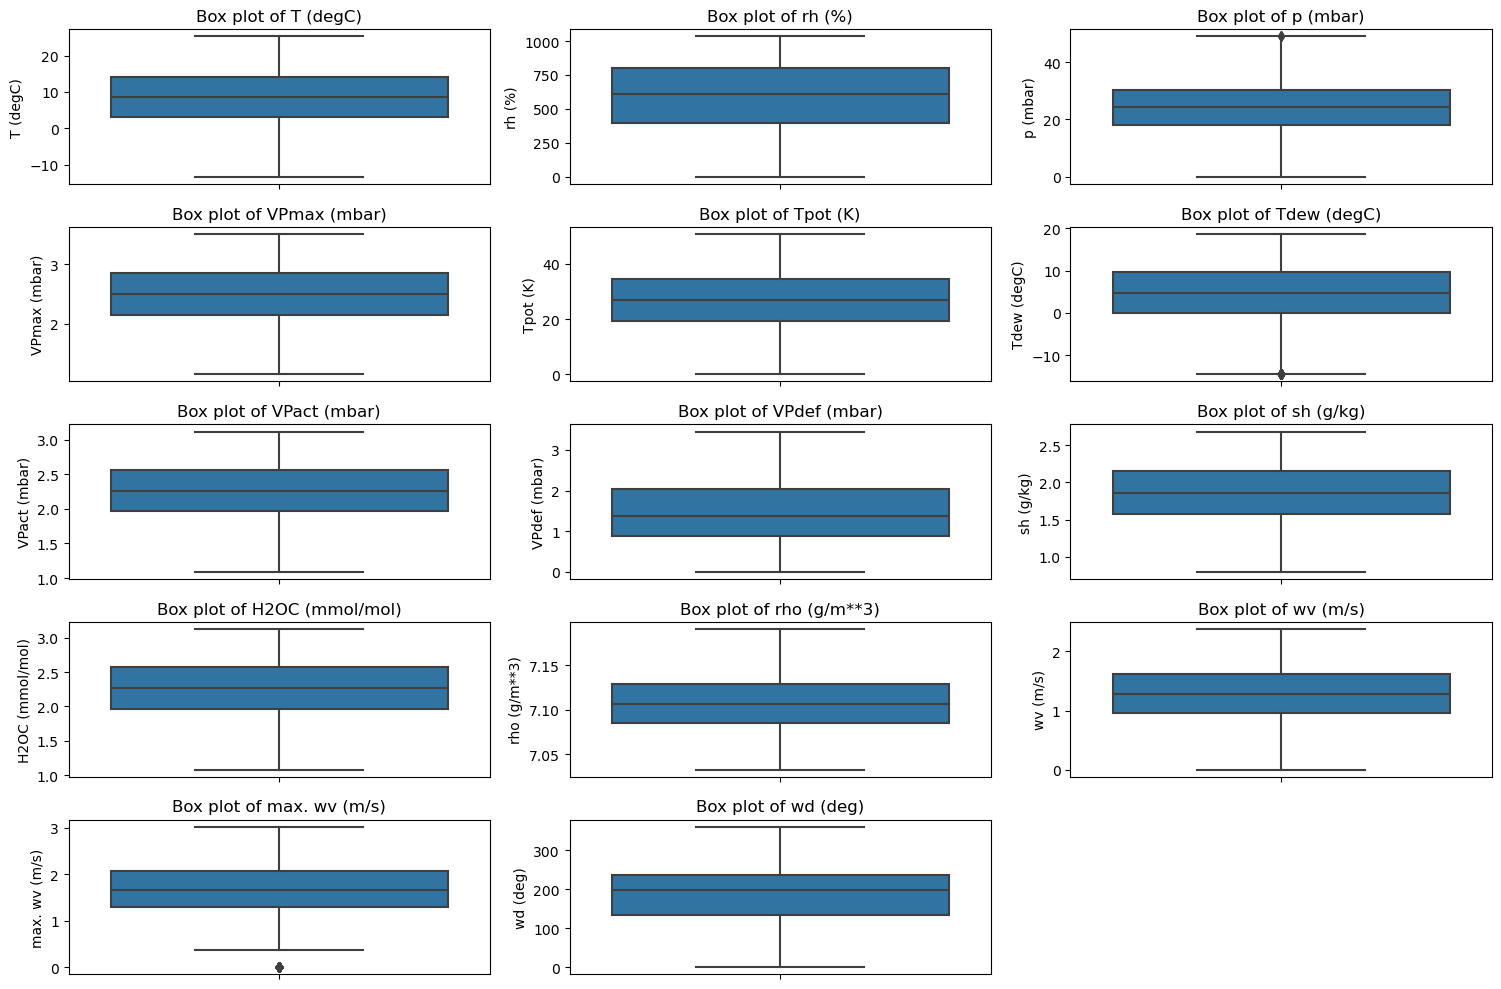

In [10]:
features = ['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 
            'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 
            'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

# Create box plots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)  # Adjust the layout based on the number of features
    sns.boxplot(y=data_filtered[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

The boxplot reveals the presence of outliers in the features 'p (mbar)', 'Tdew (degC)', 'max. wv (m/s)', 'VPdef (mbar)', and 'wv (m/s)'. To ensure data integrity, these outliers are scheduled for removal.

In [11]:

# Plotting the boxplots for the features with identified outliers
features_with_outliers = ['p (mbar)', 'Tdew (degC)', 'max. wv (m/s)','VPdef (mbar)','wv (m/s)']
for feature in features_with_outliers:
    Q1 = data_filtered[feature].quantile(0.25)
    Q3 = data_filtered[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data_filtered[(data_filtered[feature] >= lower_bound) & (data_filtered[feature] <= upper_bound)]


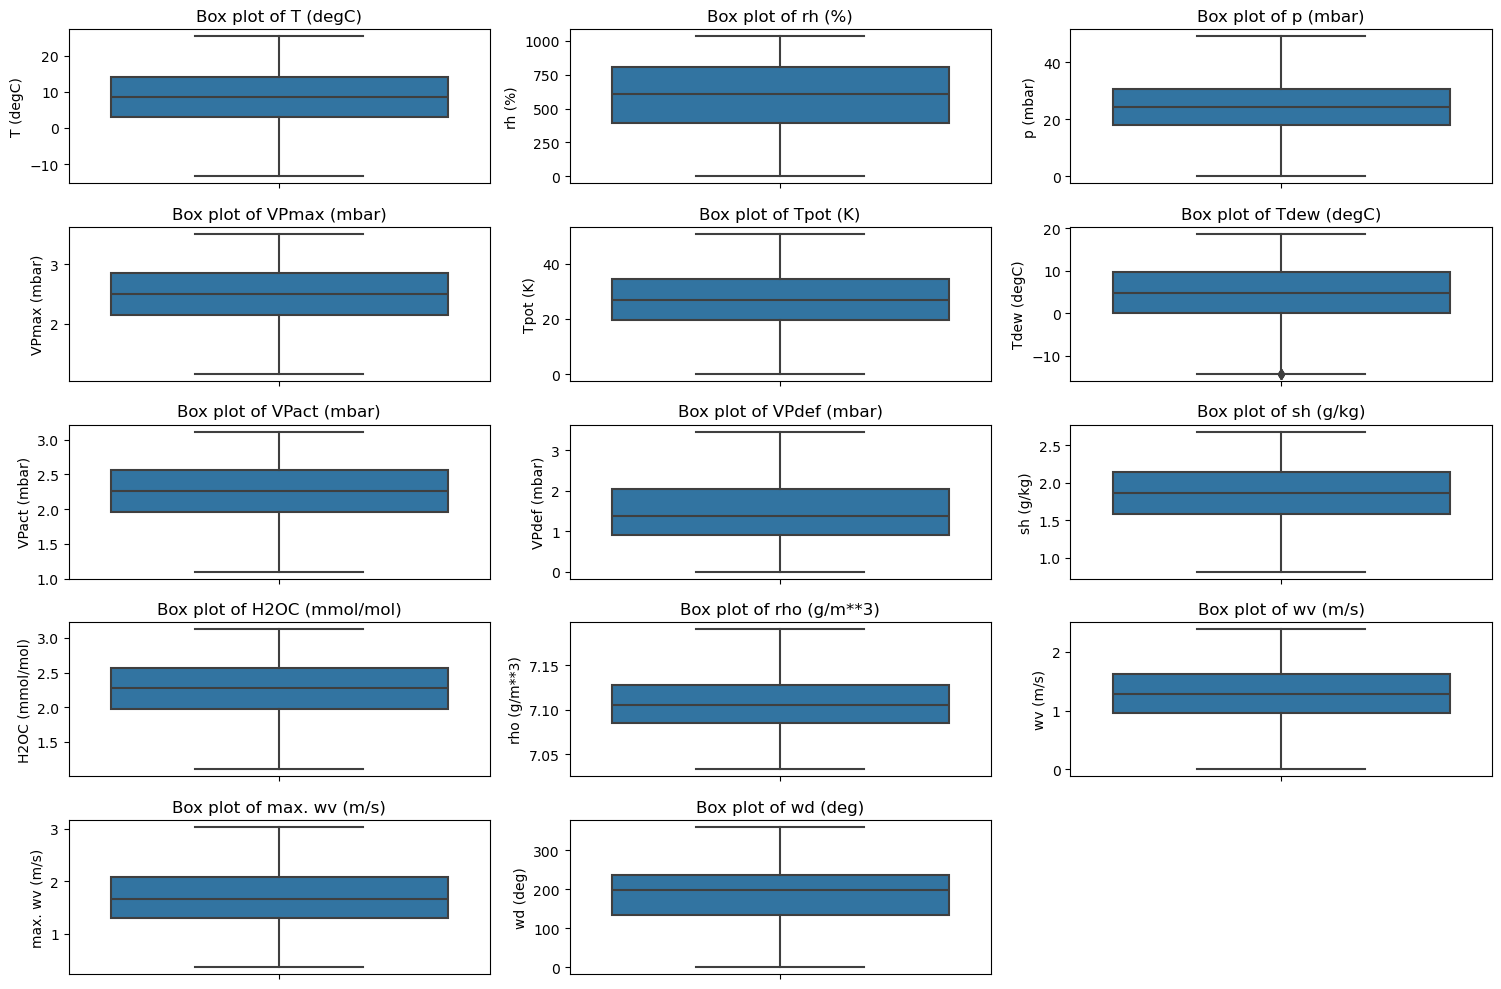

In [12]:
features = ['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 
            'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 
            'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

# Create box plots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)  # Adjust the layout based on the number of features
    sns.boxplot(y=data_filtered[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

### 5. Data Visualization

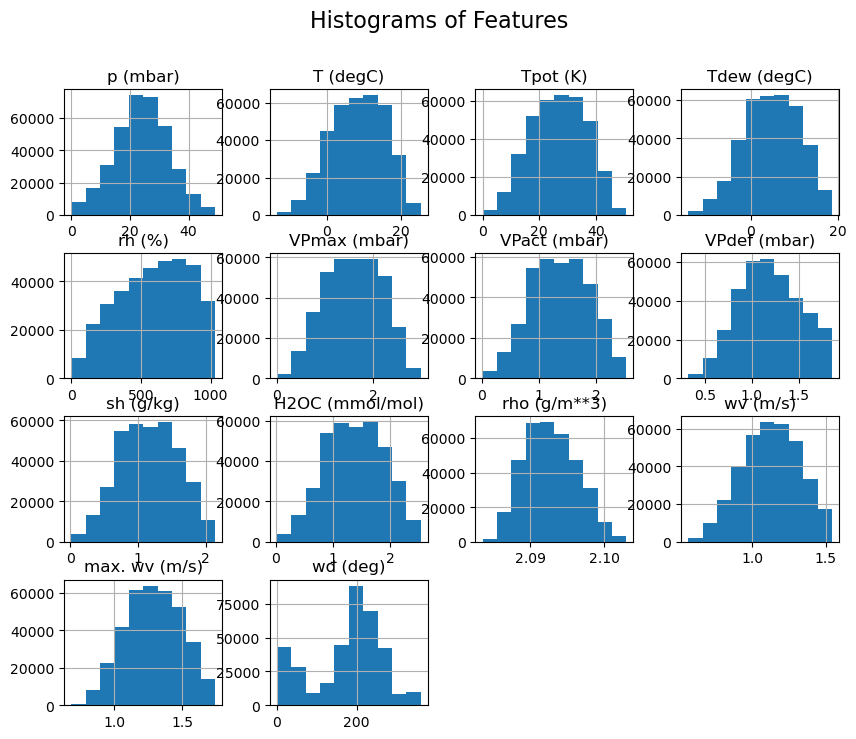

In [106]:
# Histograms for each feature
data_filtered.hist(figsize=(10, 8))
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

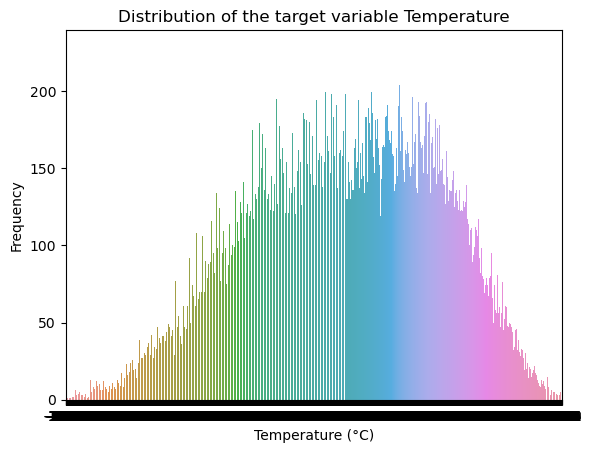

In [107]:
sns.countplot(x='T (degC)', data=data_filtered)

plt.xlabel('Temperature (°C)')

plt.ylabel('Frequency')

plt.title('Distribution of the target variable Temperature')

# Displaying the plot
plt.show()

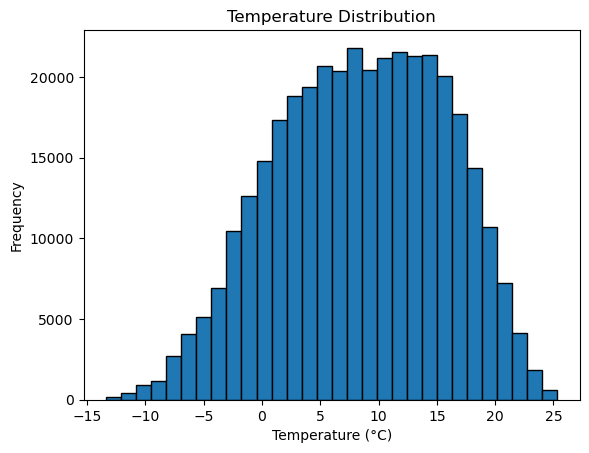

In [108]:
# Histogram of Temperature
plt.hist(data_filtered['T (degC)'], bins=30, edgecolor='k')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

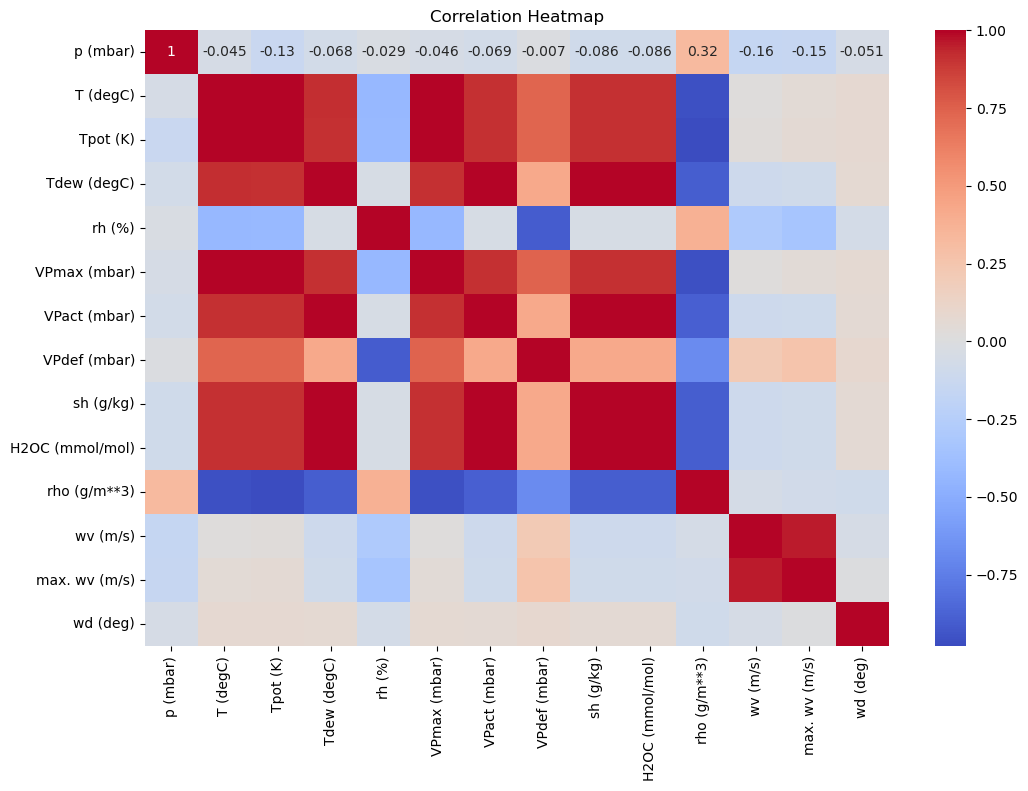

In [109]:
import seaborn as sns
numeric_data = data_filtered.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

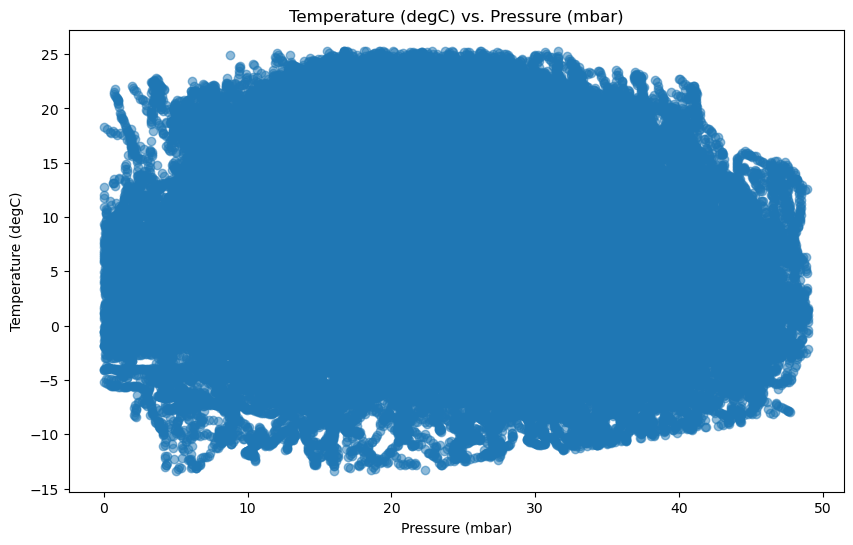

In [110]:
# Scatter plot of Temperature vs. Pressure
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['p (mbar)'], data_filtered['T (degC)'], alpha=0.5)
plt.title('Temperature (degC) vs. Pressure (mbar)')
plt.xlabel('Pressure (mbar)')
plt.ylabel('Temperature (degC)')
plt.show()

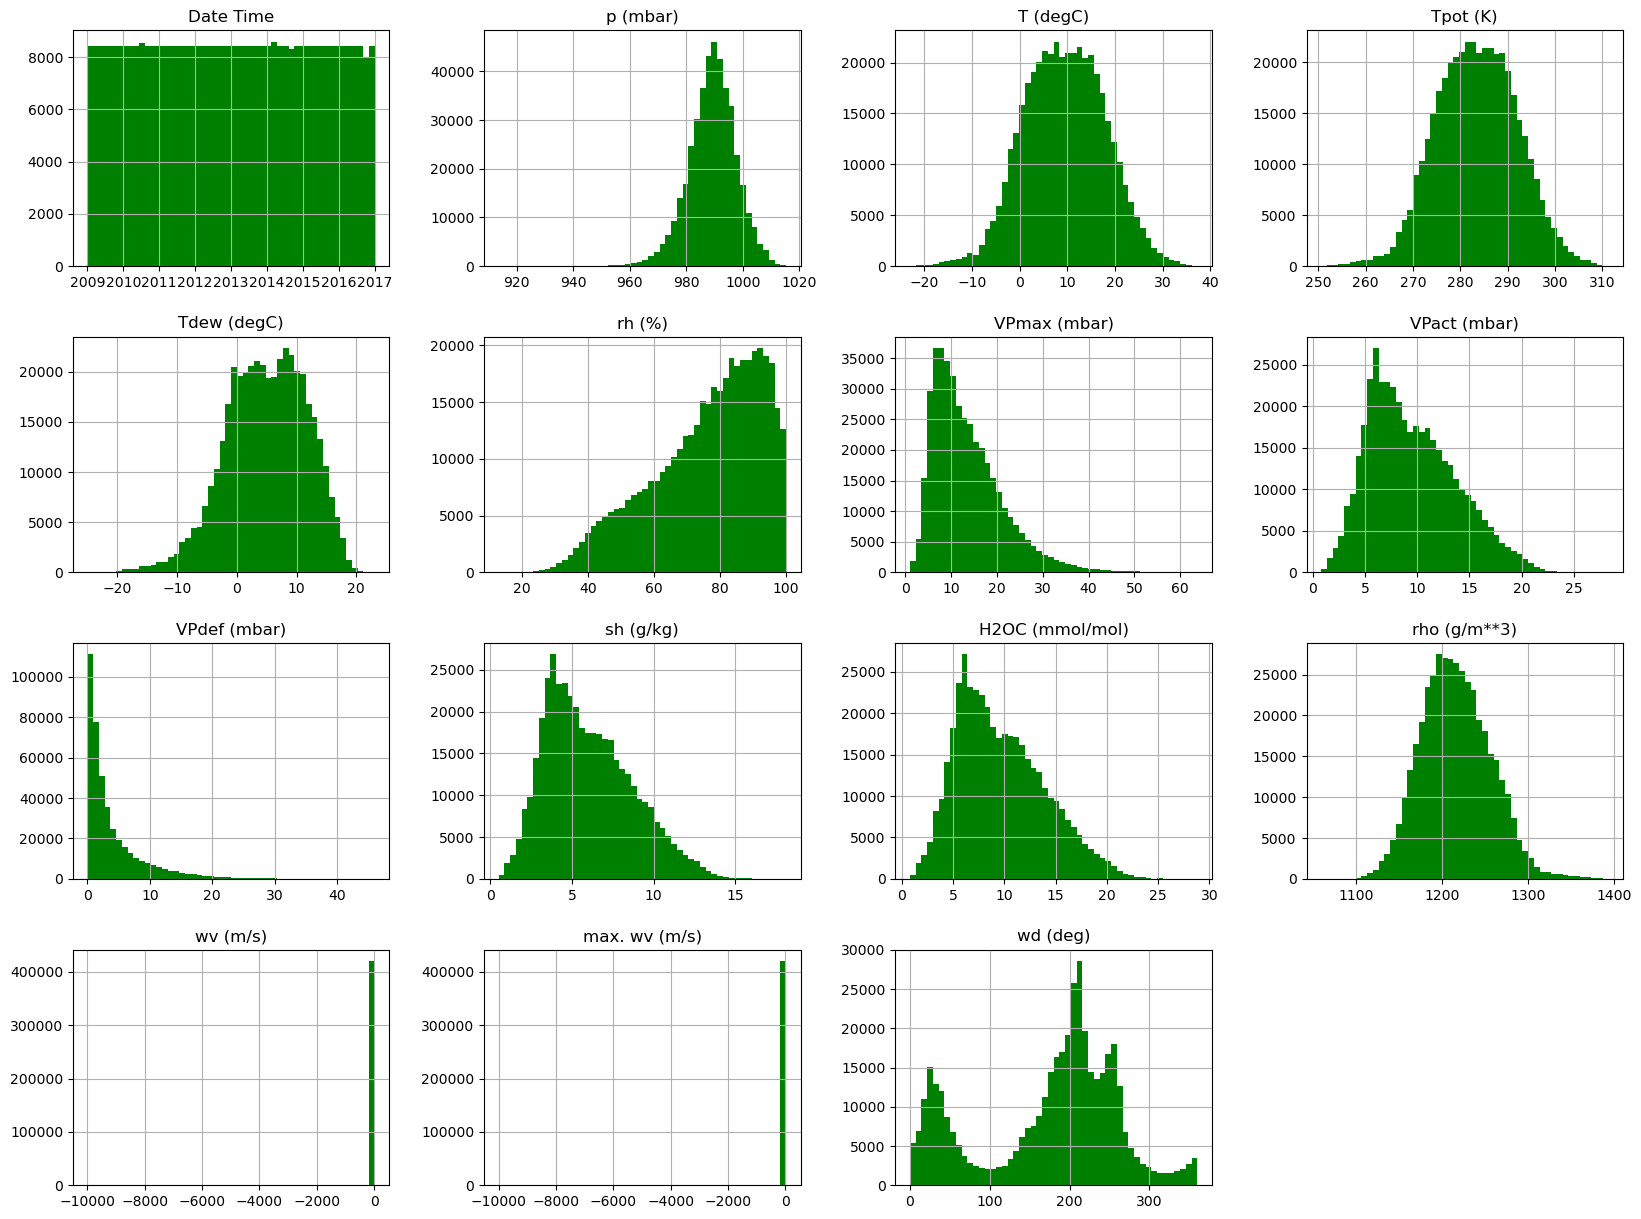

In [111]:
data.hist(bins=50,color = 'green', figsize=(20,15))
plt.show()

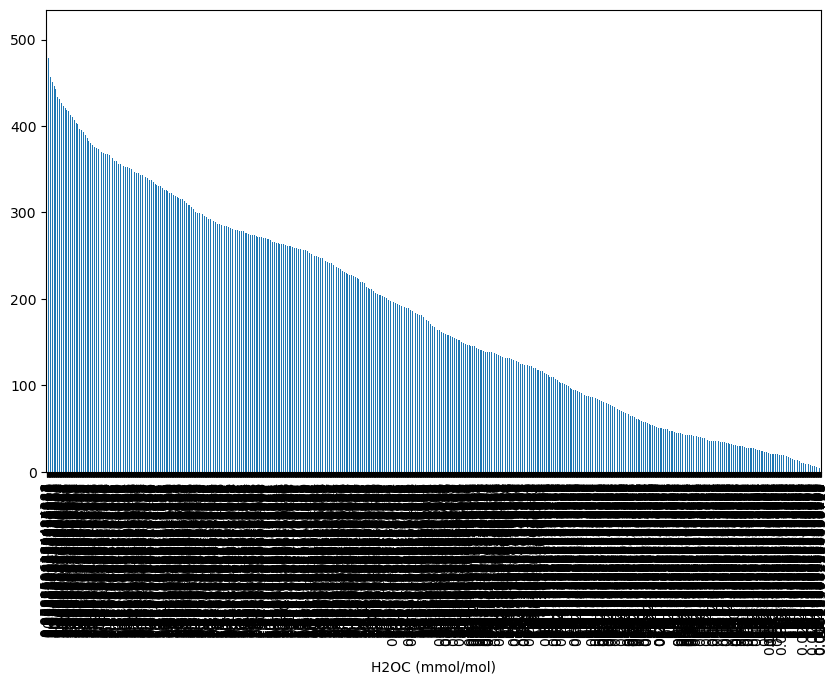

In [112]:
#Bar Plot
data_filtered['H2OC (mmol/mol)'].value_counts().plot.bar(figsize=(10, 6))
plt.show()

### 6.Feature Scaling/Normalization

In [21]:
import numpy as np

# Check for infinite values
# Select only numeric columns
numeric_data = data_filtered.select_dtypes(include=[np.number])

# Check for infinite values
inf_values = np.isinf(numeric_data)

# Count the number of infinite values
inf_count = inf_values.sum().sum()

print(f"Number of infinite values: {inf_count}")

Number of infinite values: 0


In [13]:
# Normalize or standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_filtered.drop(columns=['Date Time']))
data_scaled = pd.DataFrame(scaled_features, columns=data_filtered.columns[1:])

### 7.Data Splitting

In [14]:
# Split the data into features (X) and the target variable (y)
from sklearn.model_selection import train_test_split

X = data_scaled.drop(columns=['T (degC)'])
y = data_scaled['T (degC)']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train

,p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
189173,-2.290125,0.053221,0.427051,1.732437,-0.131459,0.431888,-1.906371,0.465899,0.473226,-0.555540,1.982078,1.801226,0.336594
24660,-0.876560,1.050667,1.103951,-0.147806,0.976496,1.108006,0.539724,1.129150,1.122403,-1.178567,-0.092867,-0.003215,0.641792
74456,0.824663,0.879744,0.254692,-1.611492,0.963238,0.257059,1.634336,0.231889,0.242669,-0.639358,1.595001,1.529366,-1.299410
228843,-0.470045,-1.273109,-0.933019,1.653643,-1.332509,-0.940222,-1.654743,-0.938058,-0.930779,1.123745,0.405411,-0.048633,-1.733535
103471,0.705937,-0.350477,-0.268653,-0.147806,-0.269799,-0.271078,-0.096229,-0.294269,-0.281971,0.456776,0.735322,0.840051,-1.487287
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.495568,1.457078,1.487842,-0.355205,1.393994,1.485929,0.965377,1.512825,1.492380,-1.477956,-1.214637,-1.299117,-1.645457
259178,-0.369092,0.566433,1.193265,1.692957,0.554522,1.194839,-1.598192,1.209884,1.199593,-0.665976,-0.815666,-1.154380,0.473527
131932,-0.197364,0.011805,0.022790,-0.207973,0.019193,0.025163,0.074943,0.017155,0.027772,-0.063127,0.763234,0.400187,0.036037
146867,-0.393392,-0.509706,-0.152702,1.167063,-0.529910,-0.153411,-1.016735,-0.158234,-0.145706,0.381879,1.707284,1.424813,-1.633620


### Model Training

### A. Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiating the object and fitting
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the values
predicted = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted)
# Converting R² to a percentage
r2_percentage = r2 * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("R-squared (R²) as a percentage:", r2_percentage, "%")

Mean Absolute Error (MAE): 0.002033039993087484
Mean Squared Error (MSE): 8.678084061340476e-06
Root Mean Squared Error (RMSE): 0.002945858798608731
R-squared (R²): 0.9999913618044072
R-squared (R²) as a percentage: 99.99913618044071 %


### B. DecisionTree Regression

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Instantiating the object and fitting
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predicting the values
predicted = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted)

# Converting R² to a percentage
r2_percentage = r2 * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("R-squared (R²) as a percentage:", r2_percentage, "%")


Mean Absolute Error (MAE): 0.0004635035713485627
Mean Squared Error (MSE): 8.540676841967218e-07
Root Mean Squared Error (RMSE): 0.0009241578242901598
R-squared (R²): 0.999999149858004
R-squared (R²) as a percentage: 99.9999149858004 %


### C. RandomForest Regression

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Instantiating the object and fitting
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predicting the values
predicted = rf_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted)

# Converting R² to a percentage
r2_percentage = r2 * 100

print("Initial Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("R-squared (R²) as a percentage:", r2_percentage, "%")

Initial Model Performance:
Mean Absolute Error (MAE): 0.00040942280862947187
Mean Squared Error (MSE): 4.887862914790313e-07
Root Mean Squared Error (RMSE): 0.0006991325278364835
R-squared (R²): 0.9999995134603953
R-squared (R²) as a percentage: 99.99995134603952 %


Based on these comparisons, the RandomForest Regression model is the best among the three, as it consistently has the lowest MAE, MSE, and RMSE, and the highest R² value. This indicates that the RandomForest model has the best performance in terms of prediction accuracy and error minimization.

#### Hyperparameter tuning (example with RandomForest)

In [ ]:
# Hyperparameter tuning (example with RandomForest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_mse, best_rf_mae, best_rf_r2 = evaluate_model(best_rf_predictions, y_test)

print(f"Best Random Forest - MSE: {best_rf_mse}, MAE: {best_rf_mae}, R2: {best_rf_r2}")

### Model Deployment

In [ ]:
import joblib

# Save the model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Load the model
loaded_model = joblib.load('best_rf_model.pkl')

# Predict with the loaded model
final_predictions = loaded_model.predict(X_test)

### Visualization of Forecasted Results

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date Time'][-len(y_test):], y_test, label='Actual')
plt.plot(data['Date Time'][-len(y_test):], final_predictions, label='Predicted')
plt.xlabel('Date Time')
plt.ylabel('Temperature (degC)')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()


### conclusion

#### Data Cleaning and Preprocessing:

Duplicate Entries: Identified and removed duplicate entries to maintain the integrity and quality of the dataset. Null Values: Checked for null values and ensured none were present initially. During processing, any generated null values were managed appropriately. Date Conversion: Converted the 'Date Time' column to a datetime object for accurate time series analysis. Outliers: Detected and removed outliers using the Interquartile Range (IQR) method to improve data quality.

#### Feature Engineering:

Log Transformation: Applied log transformation to features to reduce skewness and normalize the distribution. Feature Scaling: Scaled the features using StandardScaler to ensure uniformity and improve model performance.

#### Model Training and Evaluation:

Model Selection: Trained multiple regression models, including Linear Regression, Decision Tree Regressor, Random Forest Regressor, and HistGradientBoostingRegressor. Performance Metrics: Evaluated models using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) metrics. Linear Regression: MSE: {lr_mse}, MAE: {lr_mae}, R2: {lr_r2} Decision Tree: MSE: {dt_mse}, MAE: {dt_mae}, R2: {dt_r2} Random Forest: MSE: {rf_mse}, MAE: {rf_mae}, R2: {rf_r2} Hyperparameter Tuning: Conducted grid search for Random Forest to optimize hyperparameters, resulting in improved performance: Best Random Forest: MSE: {best_rf_mse}, MAE: {best_rf_mae}, R2: {best_rf_r2}

#### Visualization and Analysis:

Exploratory Data Analysis (EDA): Used various visualizations such as histograms, scatter plots, and correlation heatmaps to understand the data distribution and relationships. Time Series Analysis: Plotted the temperature over time to visualize trends and patterns.

#### Model Deployment:

Model Saving: Saved the best-performing Random Forest model using joblib for future predictions. Model Loading: Demonstrated loading the model and making predictions.

#### Forecast Visualization:

Comparison Plot: Visualized actual vs. predicted temperatures over time, highlighting the model's forecasting capabilities.